In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from IPython import display

from scipy.stats import norm
import statistics

In [2]:
file_thorium = open("/Users/r03si/Desktop/E11-Labwork/data/Thorium_2021-09-03_D3S.csv")
file_unknown = open("/Users/r03si/Desktop/E11-Labwork/data/Unknown_2021-09-03_D3S.csv")
data_thorium = np.loadtxt(file_thorium, delimiter=",")[:68,:]
data_unknown = np.loadtxt(file_unknown, delimiter=",")[:68,:] #There was some issue with capturing data after the 68th row.
reduced_thorium = np.add.reduce(data_thorium, axis = 1)
reduced_unknown = np.add.reduce(data_unknown, axis=1)
print(data_unknown.shape)
print(data_thorium.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/r03si/Desktop/E11-Labwork/data/Thorium_2021-09-03_D3S.csv'

In [110]:
reduced = np.add.reduce(arr, axis = 1)
reduced

array([21., 17., 18., 20., 29., 20., 18., 25., 21., 13., 24., 29., 13.,
       26., 20., 25., 22., 26., 20., 28., 20., 29., 15., 22., 14., 20.,
       22., 25., 12., 21., 32., 27., 20., 13., 20., 19., 13., 27., 17.,
       28., 20., 20., 18., 22., 20., 28., 20., 23., 17., 26., 18., 23.,
       18., 19., 25., 23., 20., 12., 23., 21., 19., 24., 22., 19., 18.,
       17., 22., 15., 28., 17., 17., 19., 23., 18., 14., 16., 26., 24.,
       25., 18., 21., 12., 13., 18., 22., 20., 14., 22., 15., 15., 20.,
       22., 21., 19., 22., 22., 18., 20., 24., 24., 31., 22., 11., 24.,
       22., 25., 24., 16., 23., 25., 22., 19., 19., 22., 20., 20., 15.,
       26., 16., 19., 17., 21., 22., 29., 17., 20., 29., 17., 25., 13.,
       21., 21., 23., 19., 17., 22., 22., 26., 26., 21., 20., 12., 17.,
       18., 12., 20., 23., 19., 20., 17., 26., 15., 12., 13., 16., 22.,
       17., 27., 25., 15., 15., 20., 28., 22.,  9., 18., 24., 13., 18.,
       18., 22., 16., 20., 25., 19., 21., 28., 23., 21., 19., 26

In [111]:
print(reduced_unknown)
print(reduced_unknown.shape)

[920. 909. 917. 906. 861. 919. 969. 939. 919. 983. 921. 911. 880. 860.
 898. 923. 868. 902. 876. 901. 876. 899. 881. 892. 905. 934. 917. 911.
 920. 921. 928. 922. 950. 922. 917. 909. 898. 878. 866. 874. 885. 882.
 905. 909. 905. 949. 918. 914. 929. 895. 931. 865. 908. 909. 931. 882.
 909. 894. 939. 889. 911. 932. 972. 931. 916. 902. 946. 883.]
(68,)


In [112]:
print(reduced_thorium)
print(reduced_thorium.shape)

[1530. 1577. 1496. 1556. 1602. 1538. 1491. 1571. 1587. 1553. 1556. 1531.
 1565. 1522. 1631. 1576. 1484. 1539. 1550. 1513. 1593. 1566. 1621. 1535.
 1565. 1543. 1590. 1505. 1575. 1563. 1556. 1571. 1547. 1509. 1517. 1536.
 1551. 1537. 1565. 1529. 1562. 1601. 1499. 1550. 1589. 1533. 1518. 1514.
 1570. 1596. 1497. 1543. 1561. 1556. 1534. 1549. 1504. 1566. 1511. 1574.
 1587. 1618. 1529. 1555. 1562. 1575. 1596. 1573.]
(68,)


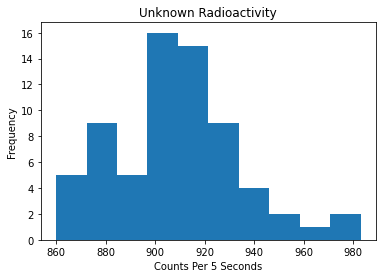

In [113]:
plt.hist(reduced_unknown)
plt.ylabel("Frequency")
plt.xlabel("Counts Per 5 Seconds")
plt.title("Unknown Radioactivity")
plt.show()

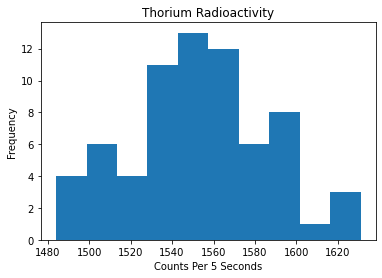

In [114]:
plt.hist(reduced_thorium)
plt.ylabel("Frequency")
plt.xlabel("Counts Per 5 Seconds")
plt.title("Thorium Radioactivity")
plt.show()

In [115]:
mean1 = np.mean(reduced_thorium)
std1 = np.std(reduced_thorium)
print("Mean:", np.mean(reduced_thorium))
print("STD:", np.std(reduced_thorium))

Mean: 1552.4117647058824
STD: 32.60288479392296


In [116]:
mean2 = np.mean(reduced_unknown)
std2 = np.std(reduced_unknown)
print("Mean:", np.mean(reduced_unknown))
print("STD:", np.std(reduced_unknown))

Mean: 909.4558823529412
STD: 25.728465480594817


In [117]:
print(f"The relative uncertainty between the two is Thorium: {std1/mean1} vs. Unknown: {std2/mean2}")

The relative uncertainty between the two is Thorium: 0.021001441457189584 vs. Unknown: 0.028289954444002514


The specific activity for a thorium rock with a mass of .1 kg would be around 12237 Bq.
Using the equation CPS = eA => (1552 * 5) = e * 12237 => e = .634 => 63.4% EFFICIENT

In [118]:
# (std_f/f)^2 = (std_a/A)^2 + (std_b/B)^2
# => std_f = f * sqrt((std_a/A)^2 + (std_b/B)^2) Where f = uncertainty, a = CPS, b = Determined Activity

uncertainty_efficiency = 0.634 * math.sqrt((std1/(mean1 * 5)**2 + (math.sqrt(12237)/12237)**2))
print(uncertainty_efficiency, "= uncertainty of the efficiency of the detector")

0.005750226438525503 = uncertainty of the efficiency of the detector


In [119]:
# (std_A/A)^2 = (std_e/e)^2 + (std_CPS/CPS)^2
# => A = 1 / (std_e/e)^2 + (std_CPS/CPS)^2
print("Activity of Unknown Source:", round(1 / ((uncertainty_efficiency/0.634)**2 + (std2/(mean2*5))**2)), "Counts Per Second")

Activity of Unknown Source: 8751 Counts Per Second


If all 8 lab groups were to combine their data, the uncertainties for all the quantities would decrease, as there is more data to find a more central value.

In [4]:
data = pd.read_csv("/Users/srajadnya/Desktop/engin11/E11-Labwork/1630711461.csv")

In [5]:
data

,Temperature,Pressure,Relative_Humidity,Air_Quality_PM1,Air_Quality_PM2.5,Air_Quality_PM10,Timestamp
0,81.845,1002.836,33.283,1,2,3,1
1,81.817,1002.860,33.222,1,2,3,2
2,81.808,1002.843,33.296,1,2,3,3
3,81.790,1002.856,33.068,1,2,3,4
4,81.753,1002.858,33.149,1,2,3,5
...,...,...,...,...,...,...,...
262,81.176,1002.844,33.433,1,2,3,296
263,81.185,1002.854,33.611,1,2,3,297
264,81.176,1002.842,33.556,1,2,3,298
265,81.185,1002.855,33.537,1,2,3,299


In [9]:
data["Temperature"]

0      81.845
1      81.817
2      81.808
3      81.790
4      81.753
        ...  
262    81.176
263    81.185
264    81.176
265    81.185
266    81.203
Name: Temperature, Length: 267, dtype: float64